In [1]:
%%markdown
two defining elements of Bayesian statistics:

1. choosing prior distributions
2. using probability to represent the unknown

two defining elements of Bayesian statistics:

1. choosing prior distributions
2. using probability to represent the unknown


In [2]:
from scipy.stats import binom

In [3]:
# euro coin problem

k = 1   # number of head appears
n = 2   # toss 2 times
p = 0.5 # probability of H
binom.pmf(k, n, p)

0.5000000000000002

In [4]:
binom.pmf([0, 1, 2], n, p)

array([0.25, 0.5 , 0.25])

In [6]:
from empiricaldist import Pmf

ks = [0,1,2]
ps = binom.pmf(ks, n, p)
Pmf(ps, ks)

,probs
0,0.25
1,0.50
2,0.25


<Axes: >

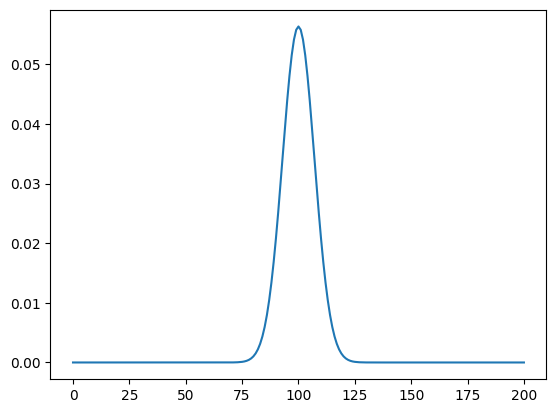

In [9]:
def make_binomial(n, p):
    ks = list(range(n+1))
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

toss200 = make_binomial(200, 0.5)
toss200.plot()

In [17]:
help(toss200.max_prob)
toss200.max_prob()

Help on method mode in module empiricaldist.empiricaldist:

mode(**kwargs) method of empiricaldist.empiricaldist.Pmf instance
    Most common value.
    
    If multiple quantities have the maximum probability,
    the first maximal quantity is returned.
    
    :return: float



100

In [18]:
toss200.prob_ge(130)

1.3264377797634128e-05

In [20]:
import numpy as np
hypos = np.linspace(0, 1, 101)
hypos

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [31]:
# each hypothesis has the same probability from the start
prior = Pmf(1, hypos)
prior

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [32]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

posterior = prior.copy()
for c in 'H' * 140:
    posterior *= likelihood_heads
for c in 'T' * 100:
    posterior *= likelihood_tails

posterior.normalize()
posterior

,probs
0.00,0.000000e+00
0.01,2.856219e-211
0.02,1.442378e-169
0.03,2.324991e-145
0.04,2.557374e-128
...,...
0.96,4.132795e-73
0.97,5.655101e-85
0.98,5.846854e-102
0.99,1.910730e-131


In [33]:
posterior.max_prob() # the most likely mass distribution of the coin

0.58

<Axes: >

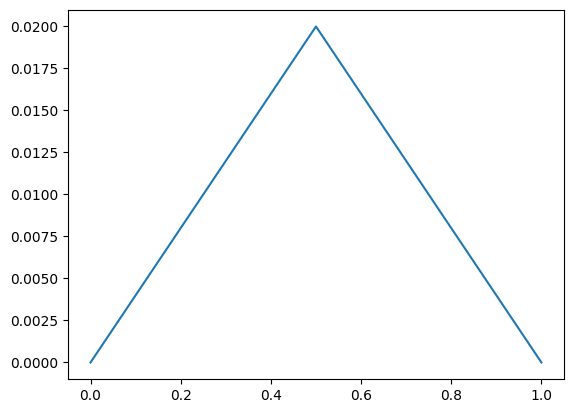

In [46]:
# instead of guessing all distribution is the same, we tend to believe the coin is balanced from the start. so we use a triangular prior.
hypos = np.linspace(0, 1, 101)
ps = [0.5 - abs(i - 0.5) for i in list(hypos)]
prior = Pmf(ps, hypos)
prior.normalize()
prior.plot()

In [42]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

posterior = prior.copy()
for c in 'H' * 140:
    posterior *= likelihood_heads
for c in 'T' * 100:
    posterior *= likelihood_tails

posterior.normalize()
posterior

,probs
0.00,0.000000e+00
0.01,6.845137e-213
0.02,6.913527e-171
0.03,1.671603e-146
0.04,2.451573e-129
...,...
0.96,3.961817e-74
0.97,4.065858e-86
0.98,2.802482e-103
0.99,4.579203e-133


In [43]:
posterior.max_prob()

0.58

In [ ]:
# it's the same with changing prior. this leaves with one less thing to argue about. "swamping the priors"

In [57]:
# updating the likelihood in one go
def update_likelihood(prior, n_heads, n_tails):
    posterior = prior.copy()
    likelihood = binom.pmf(n_heads, n_heads + n_tails, prior.qs)
    posterior *= likelihood
    posterior.normalize()
    return posterior

posterior = update_likelihood(prior, 100, 110)
posterior.max_prob()

0.48

In [60]:
# MLB hit exercise
hypos = np.arange(0, 1, 0.01)
hypos

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

<Axes: >

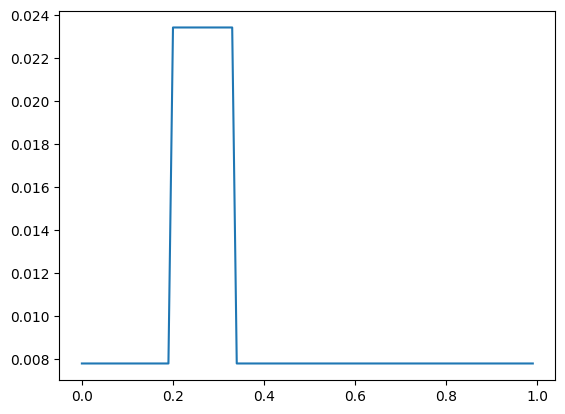

In [68]:
ps = hypos.copy()
ps[(0.2 <= hypos) & (hypos <= 0.33)] = 3
ps[hypos < 0.2] = 1
ps[hypos > 0.33] = 1
prior = Pmf(ps, hypos)
prior.normalize()
prior.plot()

<Axes: >

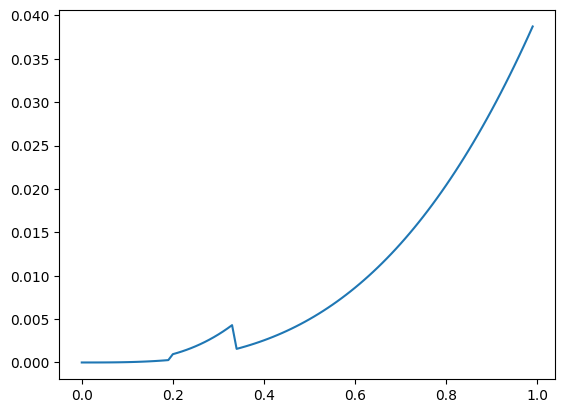

In [69]:
posterior = prior.copy()
posterior *= binom.pmf(3, 3, hypos)
posterior.normalize()
posterior.plot()

<Axes: >

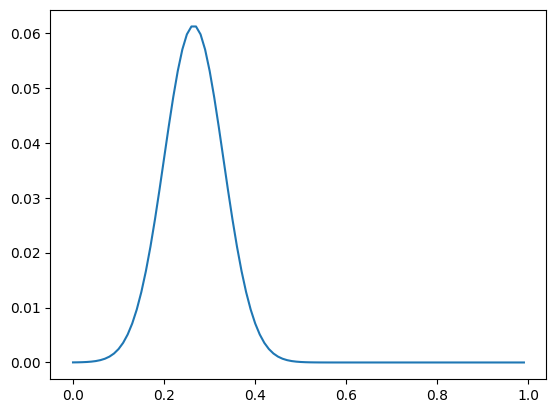

In [75]:
# the above prior may be too artificial. let's use normal distribution as the prior.
from scipy.stats import norm
ps = norm.pdf(hypos, (0.33 + 0.2)/2.0, (0.33 - 0.2)/2.0)
prior = Pmf(ps, hypos)
prior.normalize()
prior.plot()

<Axes: >

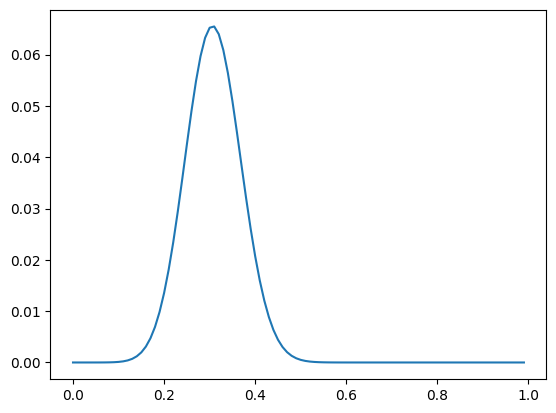

In [76]:
posterior = prior.copy()
posterior *= binom.pmf(3, 3, hypos)
posterior.normalize()
posterior.plot()

<Axes: >

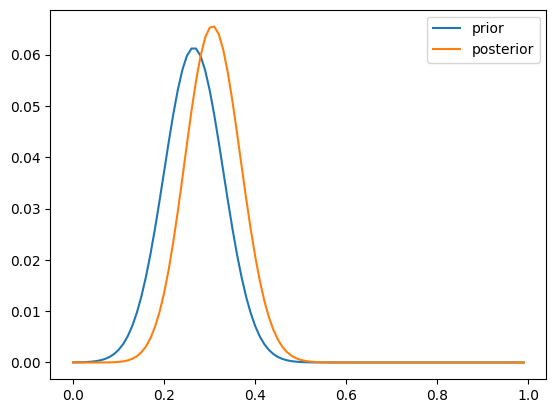

In [84]:
import pandas as pd
pd.concat([prior, posterior], axis=1, keys=['prior', 'posterior']).plot()

In [87]:
prior.max_prob(), posterior.max_prob()

(0.26, 0.31)

(0.26, 0.31, 0.38)

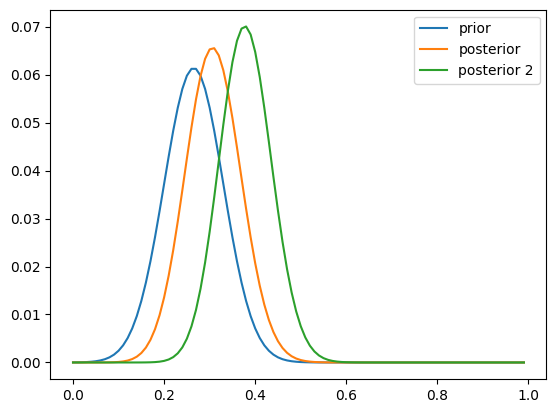

In [88]:
# how about the player hits ten times in a row?
posterior2 = prior.copy()
posterior2 *= binom.pmf(10, 10, hypos)
posterior2.normalize()
import pandas as pd
pd.concat([prior, posterior, posterior2], axis=1, keys=['prior', 'posterior', 'posterior 2']).plot()
prior.max_prob(), posterior.max_prob(), posterior2.max_prob()

<Axes: >

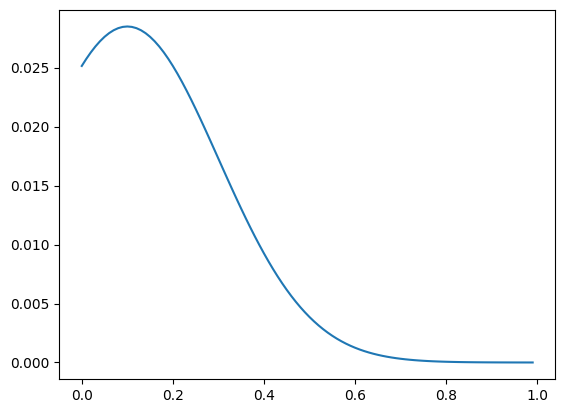

In [96]:
# cheat on taxes questionaire problem

# let me assume the prior to be we guess 10% of population cheat on their taxes
hypos = np.arange(0, 1, 0.01)
ps = norm.pdf(hypos, 0.1, 0.2)
prior = Pmf(ps, hypos)
prior.normalize()
prior.plot()

0.52

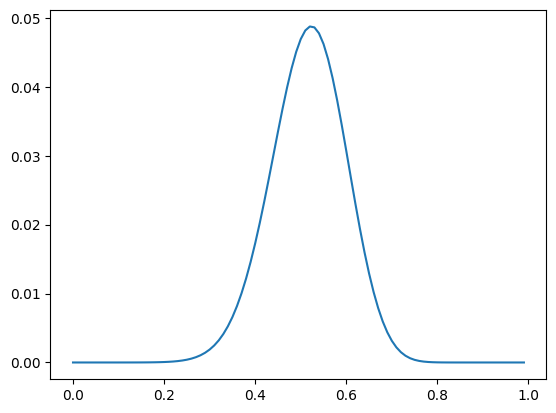

In [97]:
def update_posterior_cheat_on_taxes(prior, n_yes, n_no):
    posterior = prior.copy()
    # likelihood of saying yes = 1/2 + 1/2 * hypos
    # likelihood of saying no = 1/2 * (1 - hypos)
    likelihood = binom.pmf(n_yes, n_yes + n_no, 0.5 + 0.5 * prior.qs)
    posterior *= likelihood
    posterior.normalize()
    return posterior

posterior = update_posterior_cheat_on_taxes(prior, 80, 20)
posterior.plot()
posterior.mode()

<Axes: >

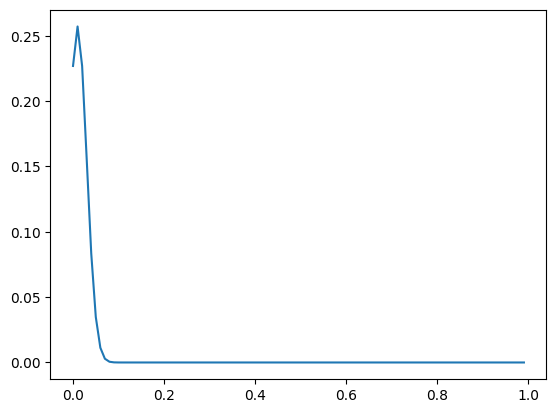

In [98]:
# 0.52 sounds so high... let's do "swamping the priors", assuming now we guess only 1% of the population cheats, and with standard deviation of 2%

hypos = np.arange(0, 1, 0.01)
ps = norm.pdf(hypos, 0.01, 0.02)
prior = Pmf(ps, hypos)
prior.normalize()
prior.plot()

0.03

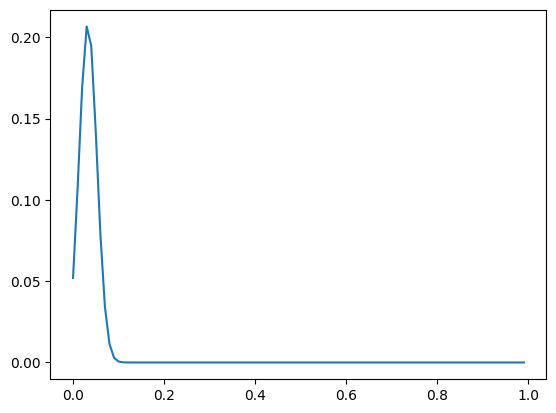

In [99]:
posterior = update_posterior_cheat_on_taxes(prior, 80, 20)
posterior.plot()
posterior.mode()

In [ ]:
# now the data shows 3% of samples cheats.

0.51

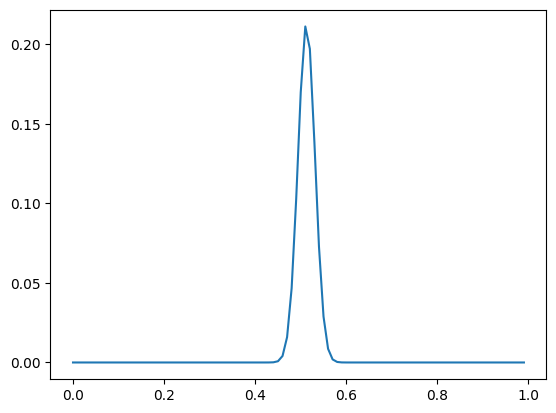

In [101]:
# coin flipping machine problem. the machine has a 20% error rate. 140/250 is head. what's the posterior distribution?

def coin_flip_machine(failure_rate, n_head, n_total):
    hypos = np.arange(0, 1, 0.01)
    # assuming it's likely a fair coin
    ps = norm.pdf(hypos, 0.5, 0.02)
    prior = Pmf(ps, hypos)
    prob_head = (hypos * (1 - failure_rate) + (1 - hypos) * failure_rate)
    likelihood_heads = binom.pmf(n_head, n_total, prob_head)
    posterior = prior * likelihood_heads
    posterior.normalize()
    return posterior

posterior = coin_flip_machine(0.2, 140, 250)
posterior.plot()
posterior.mode()

<Axes: >

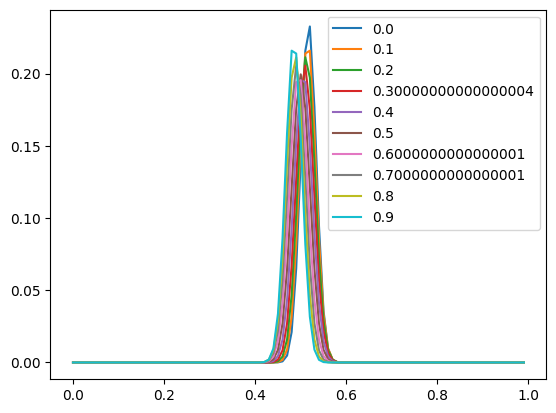

In [123]:
failure_rates = np.arange(0, 1, 0.1)
results = [coin_flip_machine(r, 140, 250) for r in list(failure_rates)]
result = pd.concat(results, axis=1, keys=failure_rates)
result.plot()

In [129]:
result.idxmax()

0.0    0.52
0.1    0.52
0.2    0.51
0.3    0.51
0.4    0.50
0.5    0.50
0.6    0.50
0.7    0.49
0.8    0.49
0.9    0.48
dtype: float64

<Axes: >

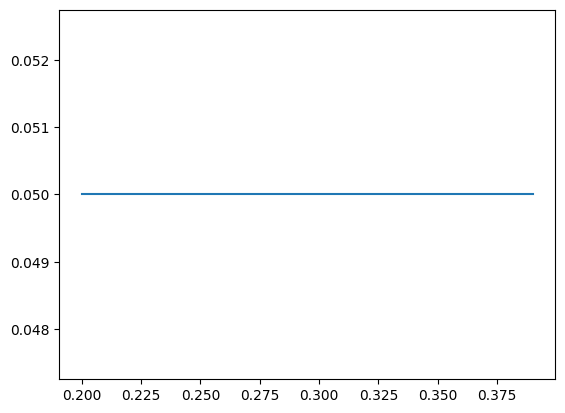

In [139]:
# Alien Blazer 9000 problem
hypos = np.arange(0.2, 0.4, 0.01)
prior = Pmf(1, hypos)
prior.normalize()
prior.plot()

0.2

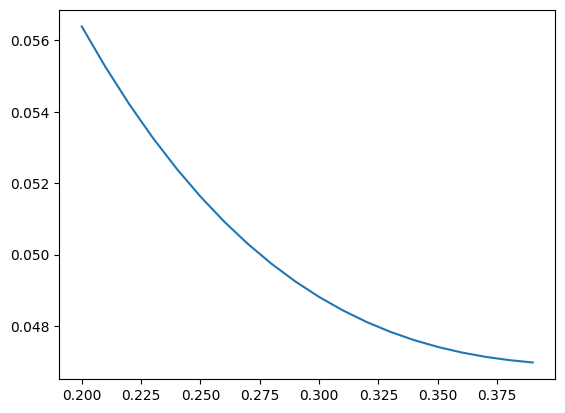

In [140]:
both_hit_zero = binom.pmf(0, 2, hypos) * binom.pmf(0, 2, hypos)
both_hit_one  = binom.pmf(1, 2, hypos) * binom.pmf(1, 2, hypos)
both_hit_two  = binom.pmf(2, 2, hypos) * binom.pmf(1, 2, hypos)
likelihood_two_hit_same_num = (1.0/3.0) * (both_hit_zero + both_hit_one + both_hit_two)
posterior = prior.copy() * likelihood_headsihood_two_hit_same_num
posterior.normalize()
posterior.plot()
posterior.max_prob()

In [ ]:
# so it's more likely that Alien Blazer 9000 hits no targets in both tests.